In [3]:
from os.path import exists

mjjaso_path = '/work/kajiyama/cnn/input/pr/thailand/5x5/pr_5x5_coarse_std_MJJASO_thailand.npy'

path_list = [mjjaso_path]
for i in path_list:
    print(exists(i))

True


In [4]:
import numpy as np

mjjaso_thailand = np.load(mjjaso_path) #mjjaso[42, 165, 4, 4]

In [5]:
import bisect

def EFD(data, class_num):
    out = data.copy() # data=(6930)
    out_sorted = np.sort(out)
    if len(data)%class_num != 0:
        print('class_num is wrong')
    else:
        batch_sample = int(len(data)/class_num)
    
    out_bnd = [out_sorted[i] for i in range(0, len(out_sorted), batch_sample)]
    out_class = np.empty(len(out_sorted))
    for i, value in enumerate(out):
        label = bisect.bisect(out_bnd, value) # giving label number
        out_class[i] = int(label - 1)
    
    out_bnd.append(out_sorted[-1])
    out_bnd = np.array(out_bnd)
    out_bnds = np.empty((len(out_bnd) - 1, 2))
    for i in range(len(out_bnds)):
        out_bnds[i, 0] = out_bnd[i]
        out_bnds[i, 1] = out_bnd[i + 1]
    return out_class, out_bnds # out_class=(6930), out_bnds=(class_num+1,2)

In [6]:
print(mjjaso_thailand.shape)

(42, 165, 4, 4)


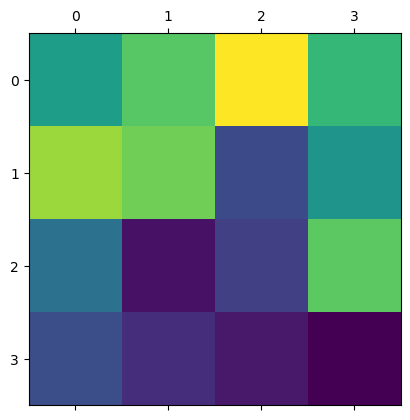

In [7]:
import matplotlib.pyplot as plt
plt.matshow(mjjaso_thailand[0, 0, :, :], )